# PREDICTORS OF MENTAL HEALTH ILLNESS

## <span style="color:BLUE"> INTRODUCTION

** This dataset measures attitudes towards mental health and frequency of mental health disorders in a  workplace. The aim of our project will be to use this data in raising awareness and improving conditions for those with mental health disorders in the workplace.Also tried to analyze the the factors affecting the treatment of an an individual & what factors should be considered to decipher whether or not a person requires treament**

## <span style="color:BLUE"> INFORMATION ABOUT DATASET

** This dataset contains information about an individual and various factors contributing and affecting their mental health . The original dataset is from *Open Sourcing Mental Illness* and the structurally improved version was extracted from *kaggle.* **


** This dataset includes the age of an employee,their gender,country,information about their family's health record,wellness programs and care options provided to a particular employee by their respective company.The type of company an individal is employed for,the implications of having a mental health conditions and its impact.The dataset consists of *28 columns and 11260 rows* **

##  <span style="color:BLUE"> WHAT ARE THE QUESTIONS:

** 1. What are the *strongest predictors* of mental health illness or certain attitudes towards mental health in the workplace? **

** 2. How are mental illness affected by Gender,work interference and Age of an individual **

** 3. How does the *frequency* of mental health illness and attitudes towards mental health vary by *geographic location*? **

** 4. What algorithms predict according to accuracy whether or not a person would be requiring treatment.**

##  <span style="color:BLUE"> WHY IS THIS AN INTERESTING DATASET AND WHAT QUESTIONS CAN IT ANSWER? 

** - Mental illnesses affect *19%* of the population in a workplace.However, only half of those affected receive treatment, often because of the stigma attached to mental health. **

** - Untreated, mental illness can contribute to higher medical expenses, poorer performance at  work, increased risk of suicide.**

** - Our aim is to try and understand the factors contributing to the mentall illness of an individual and the measures companies can take to combat it.For example,regular mental illness checkups or awareness/informational programs.**

## <span style="color:BLUE"> OBJECTIVE: 

** 1. Extensive Exploratory Data Analysis to see the factors contributing to mentall illness based on demograhpic regions,type of work.**

** 2. Utilizing Logistic regression to discern the difference in the probability of an employee having mental health in a tech company vs a non-tech company.**

** 3. Fit a linear regression model with mental_health consquence as y variable and inspect p-values to see which factors in a work place make the most significant difference.**

** 4. Implement and compare the accuracy of various machine learning models like KNN,SVM,Random forest along with cross validation to predict the factors contributing  to mental illness.**

## <span style="color:BLUE"> DATA CLEANING

** 1. Age has inconsistent values i.e greater than 100 and less than 0,thus removing these rows.**

** 2. Remove comments column as it has to many na values.**

** 3. Gender has 70 Uniques values such as Male,m,Female,femail,values are inconsistent and spelt incorrectly.Here the data      cleaning involves correcting these values and making them unique.**

## <span style="color:BLUE"> ASSUMPTION:

** 1. Legitimate information has been provided by all employees.**

** 2.  All employees are covered under the companys' health insurance policies.**

In [195]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

In [196]:
train_df = pd.read_csv("K:/Spring 2018/Statistics and Machine Learning/Datasets/survey.csv")

In [197]:
train_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [198]:
print(train_df.shape)

(1259, 27)


In [199]:
print(train_df.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


### Top 10 Countries

[('United States', 751), ('United Kingdom', 185), ('Canada', 72), ('Germany', 45), ('Netherlands', 27), ('Ireland', 27), ('Australia', 21), ('France', 13), ('India', 10), ('New Zealand', 8)]
United States


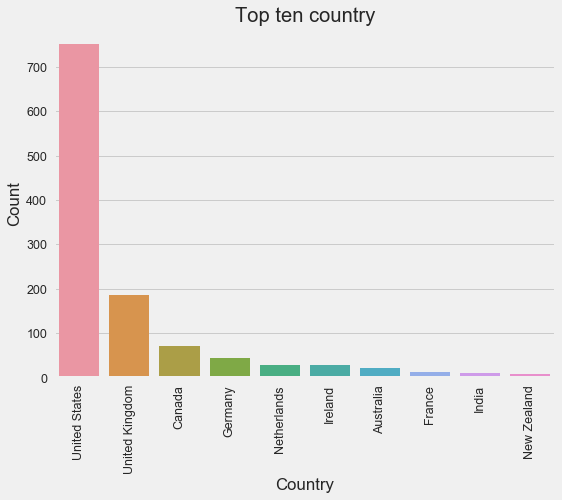

In [200]:
from collections import Counter
country_count = Counter(train_df['Country'].dropna().tolist()).most_common(10)
print(country_count)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
print(country_idx[0])
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

### Here looking at the graph we conclude that these are the top 10 countries where Mental Health Illness is a concern with United States and United Kingdom being the biggest sufferers

In [201]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [202]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state” just to make our lives easier.
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [203]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data type
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

In [204]:
# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5) 

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [205]:
#clean 'Gender'
#Slower case all columm's elements
gender = train_df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = train_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


### Age variable contains incorrect values where min is in negative and max of age was very very high. Fix those values

In [206]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)


In [207]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [208]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [209]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [210]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
age_range                      0      0.0
obs_consequence                0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
mental_vs_physical             0  

### Covariance Matrix. Variability comparison between categories of variables

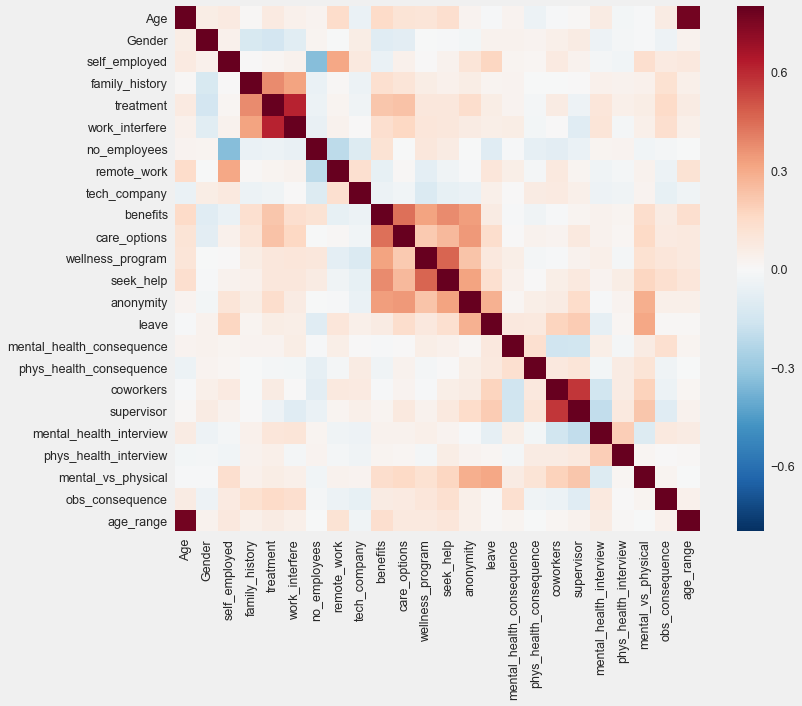

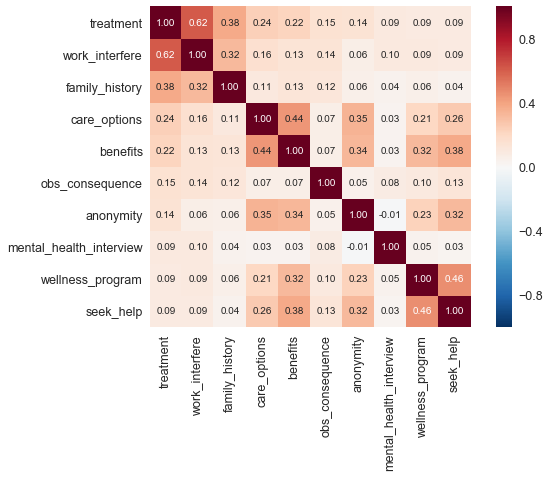

In [211]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Distribiution and density by Age

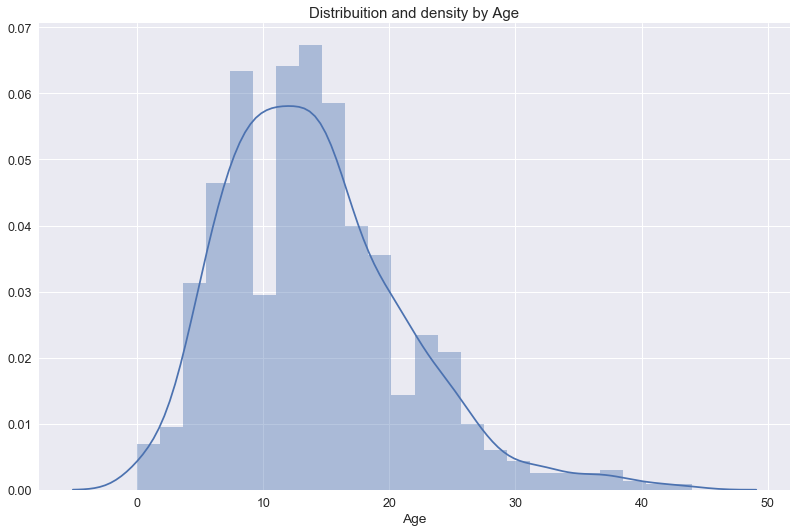

In [212]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

### Separate by treatment

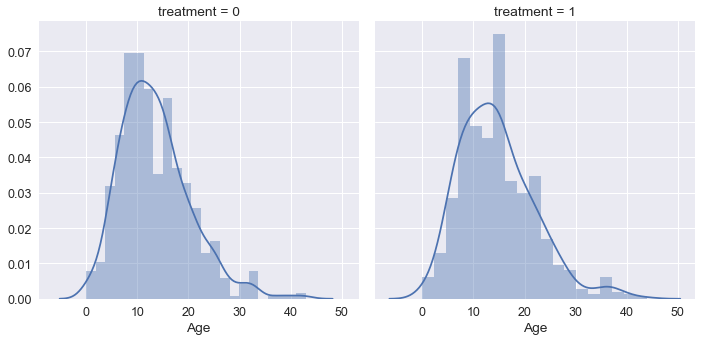

In [213]:
# Separate by treatment or not

g = sns.FacetGrid(train_df, col='treatment', size=5)
g = g.map(sns.distplot, "Age")
plt.show()

### A nested barplot to show probabilities for class and sex

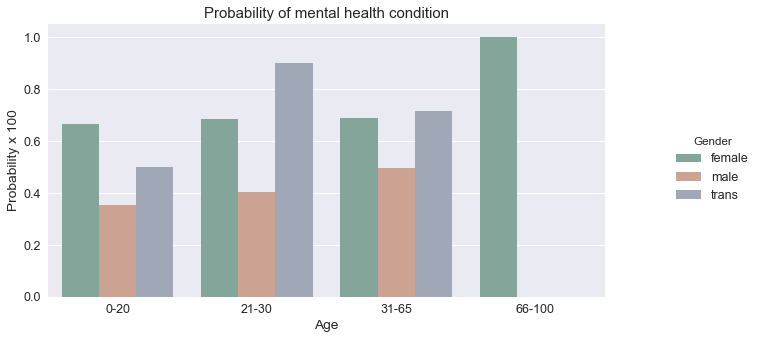

In [214]:
o = labelDict['label_age_range']

g = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True, palette = sns.color_palette("Set2", n_colors=8, desat=.5))
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

### Thus,it can be observed from the above analysis that ,that woman and trans gender have a relatively greater probability to be prone to mental illness

### Barplot to show probabilities for work interfere

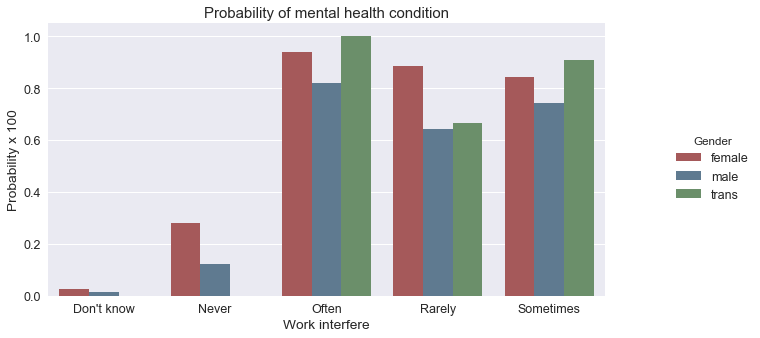

In [215]:
o = labelDict['label_work_interfere']
g = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True,palette = sns.color_palette("Set1", n_colors=8, desat=.5))
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

### Barplot to show probabilities for family history

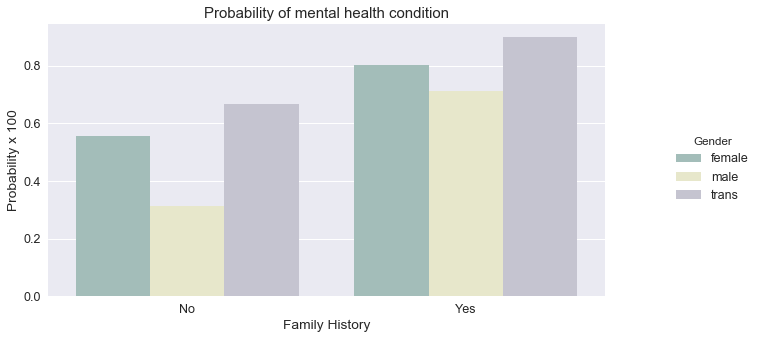

In [216]:
o = labelDict['label_family_history']
g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True,palette = sns.color_palette("Set3", n_colors=8, desat=.5))
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

### From the above graph it can be concluded that male, female and trans who have a Family History have more than 75% chance of mental illness. 

### PCA

In [217]:
from time import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import math
X_train = train_df.drop(['treatment'], axis='columns', inplace=False)
y_train = train_df['treatment']

from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train, test_size=0.30, random_state=4)

In [218]:
from collections import OrderedDict
param_grid = { "C" : [0.1]
             , "gamma" : [0.1]}
rf = SVC()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)
bp = gs.best_params_


d={}

#d['Number_Of_Features']='Classifier Score'
for i in range(2,24):
    n_components = i
    t0 = time()
   

    pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)
   #print("done in %0.3fs" % (time() - t0))

    X_train_pca = pca.transform(X_train)
    clf = SVC(C=bp['C'], kernel='rbf', gamma=bp['gamma'])
    clf = clf.fit(X_train_pca, y_train)
    d[i]=clf.score(pca.transform(X_ts), y_ts)
    d[i]*=100
from collections import OrderedDict
import operator
sorted(d.items(),key=operator.itemgetter(1), reverse=True)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   36.3s finished


[(15, 83.333333333333343),
 (16, 83.333333333333343),
 (14, 83.068783068783063),
 (13, 82.804232804232797),
 (17, 82.539682539682531),
 (5, 82.275132275132279),
 (11, 82.275132275132279),
 (6, 82.010582010582013),
 (7, 82.010582010582013),
 (9, 82.010582010582013),
 (4, 81.746031746031747),
 (8, 81.746031746031747),
 (10, 81.746031746031747),
 (12, 81.746031746031747),
 (18, 79.365079365079367),
 (19, 78.571428571428569),
 (20, 77.24867724867724),
 (21, 74.603174603174608),
 (3, 73.80952380952381),
 (22, 71.164021164021165),
 (23, 68.518518518518519),
 (2, 62.698412698412696)]

### The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. Thus, we have identified principal components for our analysis and found that 15 components are optimal. PCA also avoids over-fitting.

### Spliltting the dataset

In [219]:
# define X and y
feature_cols = ['Gender', 'self_employed', 'family_history', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help','Age']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

### Random Forest

In [222]:
train_df.head(3)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2


In [231]:
from sklearn.ensemble import RandomForestClassifier
# define X and y

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

param_grid = {'n_estimators': [10, 100, 1000]}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring=make_scorer(accuracy_score))
#clf = RandomForestClassifier(max_depth=2, random_state=0)
feature_cols1=['Gender', 'self_employed', 'family_history', 'work_interfere','Age',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
X1 = train_df[feature_cols1]
y1 = train_df.treatment


clf.fit(X1, y1)
#print(clf.feature_importances_)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [232]:
importance = clf.best_estimator_.feature_importances_

In [233]:
feature_importances = [(feature_cols1, round(importance, 2)) for feature_cols1, importance in zip(feature_cols1, importance)]


In [234]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Gender               Importance: 0.02
Variable: self_employed        Importance: 0.01
Variable: family_history       Importance: 0.07
Variable: work_interfere       Importance: 0.35
Variable: Age                  Importance: 0.09
Variable: no_employees         Importance: 0.04
Variable: remote_work          Importance: 0.02
Variable: tech_company         Importance: 0.01
Variable: anonymity            Importance: 0.02
Variable: leave                Importance: 0.04
Variable: mental_health_consequence Importance: 0.03
Variable: phys_health_consequence Importance: 0.02
Variable: coworkers            Importance: 0.03
Variable: supervisor           Importance: 0.03
Variable: mental_health_interview Importance: 0.02
Variable: phys_health_interview Importance: 0.03
Variable: mental_vs_physical   Importance: 0.03
Variable: obs_consequence      Importance: 0.02
Variable: benefits             Importance: 0.04
Variable: care_options         Importance: 0.05
Variable: wellness_program  

### A random forest lets you assess how important a variable is by calculating how much out-of-bag performance you lose when you scramble the values of the variable.We have applied the Random Forest algorithm in our project with our dependent variable as "treatment" and observed that work_interference contributes a great extent to predict treatment.

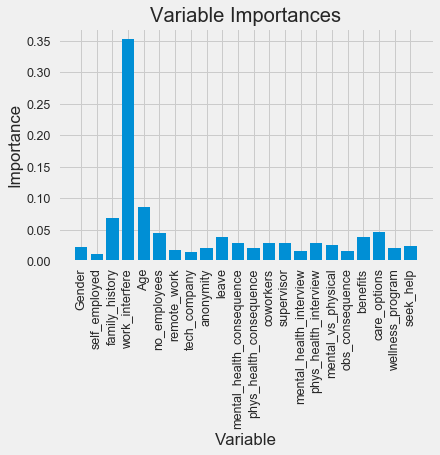

In [235]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importance)))
# Make a bar chart
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_cols1, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [236]:
feature_importances_1=sorted(feature_importances,key=lambda x: x[1],reverse=True)[:15]

feature_importances_1

[('work_interfere', 0.34999999999999998),
 ('Age', 0.089999999999999997),
 ('family_history', 0.070000000000000007),
 ('care_options', 0.050000000000000003),
 ('no_employees', 0.040000000000000001),
 ('leave', 0.040000000000000001),
 ('benefits', 0.040000000000000001),
 ('mental_health_consequence', 0.029999999999999999),
 ('coworkers', 0.029999999999999999),
 ('supervisor', 0.029999999999999999),
 ('phys_health_interview', 0.029999999999999999),
 ('mental_vs_physical', 0.029999999999999999),
 ('Gender', 0.02),
 ('remote_work', 0.02),
 ('anonymity', 0.02)]

### Below we have applied a number of Machine Learning algorithms to check their accuracy and predict the best models to predict the value of treatment.Given certain features we have tried to decipher whether or a not a person will have to undergo treatment and checked the respective accuracy of each model

### Naive Bayes

In [270]:
from sklearn.preprocessing import StandardScaler
feature_cols = ['Gender','Age','family_history','work_interfere','no_employees','remote_work','benefits','leave','mental_health_consequence','coworkers','supervisor','phys_health_interview','mental_vs_physical','anonymity','care_options']
X = train_df[feature_cols]
y = train_df.treatment
# Separating out the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [271]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    

In [272]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    
    #Data for final graph
    methodDict['Logistic_Regression']=(metrics.accuracy_score(y_test, y_pred_class)*100)

########### Logistic Regression ###############
Accuracy: 0.791005291005
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


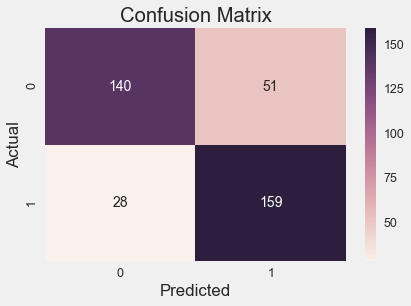

Accuracy: 0.791005291005
Classification Error: 0.208994708995
False Positive Rate: 0.267015706806
Precision: 0.757142857143
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[ 0.10258675  0.89741325]
 [ 0.92472804  0.07527196]
 [ 0.95682147  0.04317853]
 [ 0.79790288  0.20209712]
 [ 0.37779469  0.62220531]
 [ 0.03209804  0.96790196]
 [ 0.83843451  0.16156549]
 [ 0.13790372  0.86209628]
 [ 0.49570686  0.50429314]
 [ 0.43357611  0.56642389]]
79.1005291005


In [273]:
logisticRegression()
print(methodDict["Logistic_Regression"])

### KNN

In [274]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # From https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 100))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    #tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)
    methodDict['KNN']=(metrics.accuracy_score(y_test, y_pred_class)*100)

########### KNeighborsClassifier ###############
Accuracy: 0.759259259259
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1]


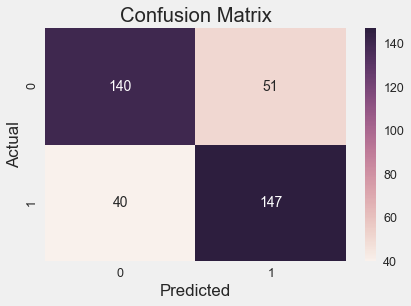

Accuracy: 0.759259259259
Classification Error: 0.240740740741
False Positive Rate: 0.267015706806
Precision: 0.742424242424
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:
 [[ 0.2  0.8]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.9  0.1]
 [ 0.1  0.9]
 [ 0.2  0.8]
 [ 0.7  0.3]
 [ 0.4  0.6]
 [ 0.6  0.4]
 [ 0.4  0.6]]


In [275]:
Knn()


The optimal number of neighbors is 35.


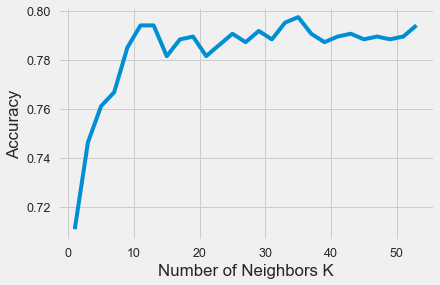

In [276]:
myList = list(range(0,55))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
#print(neighbors)
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
Accuracy = [x for x in cv_scores]
#print(Accuracy)
# determining best k
optimal_k = neighbors[Accuracy.index(max(Accuracy))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()
#print(cv_scores)

In [288]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # From https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 100))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    #tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=35, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)
    methodDict['KNN']=(metrics.accuracy_score(y_test, y_pred_class)*100)

########### KNeighborsClassifier ###############
Accuracy: 0.783068783069
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1]


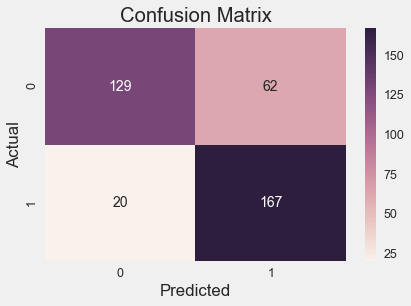

Accuracy: 0.783068783069
Classification Error: 0.216931216931
False Positive Rate: 0.324607329843
Precision: 0.729257641921
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[ 0.17142857  0.82857143]
 [ 0.85714286  0.14285714]
 [ 0.94285714  0.05714286]
 [ 0.6         0.4       ]
 [ 0.28571429  0.71428571]
 [ 0.17142857  0.82857143]
 [ 0.54285714  0.45714286]
 [ 0.31428571  0.68571429]
 [ 0.45714286  0.54285714]
 [ 0.45714286  0.54285714]]


In [289]:
Knn()

### TREE CLASSIFIER

In [279]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "criterion": ["gini", "entropy"]}
    #tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, criterion='gini', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)
    methodDict['Decision Tree']=(metrics.accuracy_score(y_test, y_pred_class)*100)

########### Tree classifier ###############
Accuracy: 0.806878306878
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


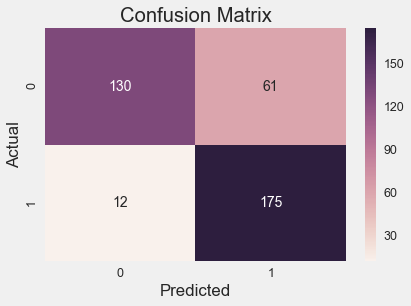

Accuracy: 0.806878306878
Classification Error: 0.193121693122
False Positive Rate: 0.319371727749
Precision: 0.741525423729
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[ 0.18823529  0.81176471]
 [ 0.97959184  0.02040816]
 [ 1.          0.        ]
 [ 0.94623656  0.05376344]
 [ 0.36097561  0.63902439]
 [ 0.05172414  0.94827586]
 [ 0.94623656  0.05376344]
 [ 0.11320755  0.88679245]
 [ 0.36097561  0.63902439]
 [ 0.36097561  0.63902439]]


In [280]:
treeClassifier()

In [281]:
clf = GaussianNB()
clf.fit(X_train, y_train)
print(clf.fit(X_train,y_train))
target_pred = clf.predict(X_test)
accuracy=accuracy_score(y_test, target_pred, normalize = True)
print(accuracy)
methodDict['Naive Bayes']=accuracy*100

GaussianNB(priors=None)
0.820105820106


In [282]:
methodDict

{'Decision Tree': 80.687830687830683,
 'KNN': 77.777777777777786,
 'Logistic_Regression': 79.100529100529101,
 'Naive Bayes': 82.010582010582013}

In [283]:
def plotSuccess():
    s = pd.Series(methodDict)
    
    #Colors
    ax = s.plot(kind='bar',
                color=[plt.cm.Paired(np.arange(len(s)))],
                width=0.4,
                figsize=(12,6.8)) 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Success')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

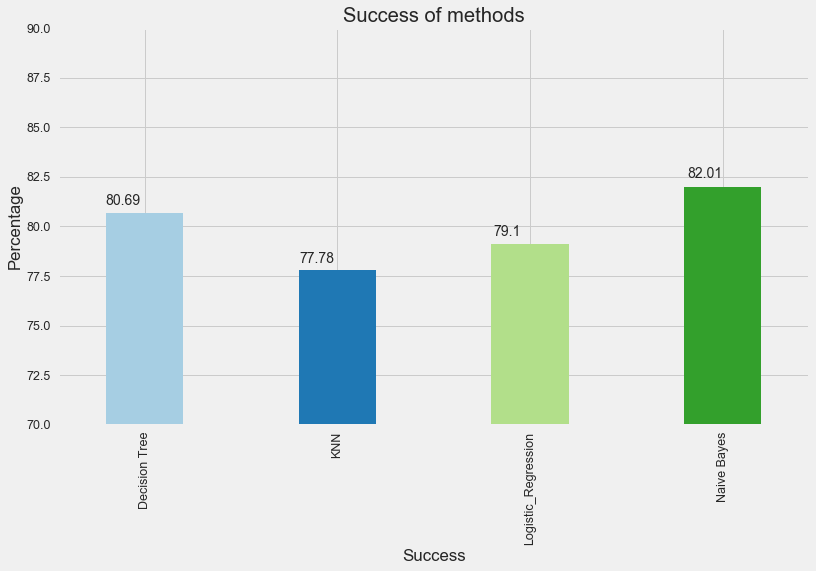

In [284]:
plotSuccess()

In [285]:
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

In [286]:
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions,'Work_interfere':X_test.work_interfere,'Age':X_test.Age})

In [287]:
results.groupby(X_test.work_interfere).mean()

,Age,Index,Treatment,Work_interfere
work_interfere,,,,
0,13.012987,674.220779,0.987013,0.0
1,15.553846,597.369231,0.969231,1.0
2,15.404762,764.428571,0.976190,2.0
3,16.277778,624.166667,1.000000,3.0
4,13.764286,654.564286,0.971429,4.0


### Above we have compared various Machine Learning algorithms and found out that Naive Bayes gives us the maximum accuracy

## <span style="color:BLUE">CONCLUSION

###  1) Mental Illness is a cause for most of the office employees,however the problem persists most in the United States of America.
### 2) According to our analysis,a number of reasons can be cited as the causes of Mental Illness such as work_interference ,peer pressure,the gender,age,the number of leaves an employee gets and so on.Thus if an office envoirnment is able to conduct more mental illness awareness workshop,is less stressful,the grave yet ignored issue of mental illness can be avoided
### 3) We compared various Machine Learning algorithmis to decipher the strongest predictors of whether or not an employee would require treatment or not.On analysis we found out that Naive Bayes gives the optimum output.One reason for this could be that it perfomrs better than the rest of the algorithms in this case is that,it the variables used are independent of each other and are mainly categorical variables,which is an ideal case for Naive Bayes


## <span style="color:BLUE"> REFERENCES
### https://onlabor.org/wp-content/uploads/2017/05/712.pdf
### https://www.health.harvard.edu/newsletter_article/mental-health-problems-in-the-workplace
### https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn